<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexte-du-projet" data-toc-modified-id="Contexte-du-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexte du projet</a></span></li><li><span><a href="#Import-et-prétraitement-des-données" data-toc-modified-id="Import-et-prétraitement-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import et prétraitement des données</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Régression-logistique" data-toc-modified-id="Régression-logistique-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Régression logistique</a></span><ul class="toc-item"><li><span><a href="#Utilisation-de-statsmodels" data-toc-modified-id="Utilisation-de-statsmodels-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Utilisation de statsmodels</a></span><ul class="toc-item"><li><span><a href="#Modèle-avec-la-totalité-des-variables" data-toc-modified-id="Modèle-avec-la-totalité-des-variables-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Modèle avec la totalité des variables</a></span></li><li><span><a href="#Sélection-des-variables" data-toc-modified-id="Sélection-des-variables-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>Sélection des variables</a></span></li></ul></li><li><span><a href="#Utilisation-de-scikit-learn" data-toc-modified-id="Utilisation-de-scikit-learn-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Utilisation de scikit-learn</a></span><ul class="toc-item"><li><span><a href="#Entrainement-d'un-modèle-de-régression-logistique-simple-(sans-pénalité)" data-toc-modified-id="Entrainement-d'un-modèle-de-régression-logistique-simple-(sans-pénalité)-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Entrainement d'un modèle de régression logistique simple (sans pénalité)</a></span></li><li><span><a href="#Optimisation-des-hyperparamètres-avec-GridSearchCV" data-toc-modified-id="Optimisation-des-hyperparamètres-avec-GridSearchCV-3.1.2.2"><span class="toc-item-num">3.1.2.2&nbsp;&nbsp;</span>Optimisation des hyperparamètres avec GridSearchCV</a></span></li></ul></li></ul></li><li><span><a href="#Méthode-des-k-means" data-toc-modified-id="Méthode-des-k-means-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Méthode des k-means</a></span></li><li><span><a href="#Algorithme-des-k-nearest-neighbors-(KNN)" data-toc-modified-id="Algorithme-des-k-nearest-neighbors-(KNN)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Algorithme des k-nearest neighbors (KNN)</a></span></li><li><span><a href="#Comparaison-des-algorithmes" data-toc-modified-id="Comparaison-des-algorithmes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Comparaison des algorithmes</a></span></li><li><span><a href="#Utilisation-d'un-pipeline" data-toc-modified-id="Utilisation-d'un-pipeline-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Utilisation d'un pipeline</a></span></li></ul></li><li><span><a href="#Test-de-l'algorithme-sur-des-données-de-production" data-toc-modified-id="Test-de-l'algorithme-sur-des-données-de-production-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test de l'algorithme sur des données de production</a></span></li></ul></div>

In [1]:
# mise en place de l'environnement
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    f1_score,
    confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn import set_config


import pickle

from scripts.P10_functions import *

%matplotlib inline

In [2]:
# on change le thème visuel des graphiques
sns.set_theme(style='whitegrid', palette='muted')

# on remplace certains paramètres des figures par les anciens paramètres par
# défaut d'avant la mise à jour
plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 72
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

# Contexte du projet
L’Organisation nationale de lutte contre le faux-monnayage (ONCFM) nous a chargé de mettre au point un algorithme capable de détecter les faux billets à partir de leurs dimensions géométriques.

Il nous est demandé de tester au moins deux algorithmes : une régression logistique (supervisé) et la méthode des k-means (non-supervisé).

# Import et prétraitement des données

In [3]:
def split_data(data, target):
    y = data[target]
    X = data.drop(columns=target)
    return X, y

In [4]:
def preprocessing(data, target, random_state=0):
    train_set, test_set = train_test_split(
        data,
        test_size=0.2,
        random_state=random_state)
    X_train, y_train = split_data(train_set, target)
    X_test, y_test = split_data(test_set, target)
    return X_train, y_train, X_test, y_test

In [5]:
# on importe les données imputées
billets_imputed = pd.read_csv('./data/billets_imputed.csv')

In [6]:
# séparation en train et test sets
X_train, y_train, X_test, y_test = preprocessing(billets_imputed, 'is_genuine')

# Classification

## Régression logistique

### Utilisation de statsmodels

#### Modèle avec la totalité des variables

In [7]:
# on ajoute une constante
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [8]:
logreg_sm = sm.Logit(endog=y_train, exog=X_train_const).fit()

Optimization terminated successfully.
         Current function value: 0.029657
         Iterations 12


In [9]:
print(logreg_sm.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            6
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.9535
Time:                        15:52:55   Log-Likelihood:                -35.588
converged:                       True   LL-Null:                       -765.88
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -144.8641    257.550     -0.562      0.574    -649.654     359.925
diagonal         0.3664      1.162      0.315      0.753      -1.912       2.645
height_left     -1.6605      1.244     -1.33

In [10]:
# on affiche la matrice de confusion
format_confusion_matrix(logreg_sm.pred_table())

Predicted,False,True
Actual,,
False,396.0,7.0
True,4.0,793.0


Par curiosité, on cherche à retrouver manuellement les prédictions à partir de l'équation de la droite.

In [11]:
# on récupère le vecteur des paramètres
params = logreg_sm.params.to_numpy()[:, np.newaxis]  # ou .reshape(-1, 1)
print('X shape:', X_train_const.shape)
print('params shape:', params.shape)

X shape: (1200, 7)
params shape: (7, 1)


In [12]:
# on calcule le produit matriciel entre la matrice X et le vecteur des paramètres
fitted = np.dot(X_train_const, params) \
    .flatten()

In [13]:
# on vérifie que les valeurs obtenues sont toutes identiques à celles du modèle
np.all(fitted == logreg_sm.fittedvalues)

True

In [14]:
# on définit la fonction logistique
def logistic(x): return 1 / (1 + np.exp(-x))

In [15]:
# on calcule les probabilités d'appartenir à la classe 1
prob = logistic(fitted)
prob[:3]

array([0.99994382, 0.99575157, 0.99961373])

In [16]:
# on prédit la classe en fonction de la probabilité
threshold = 0.5
y_train_pred = np.where(prob >= threshold, 1, 0)

In [17]:
# on représente la matrice de confusion
cm = pd.crosstab(index=y_train, columns=y_train_pred)
format_confusion_matrix(cm)

Predicted,False,True
Actual,,
False,396,7
True,4,793


On retrouve le même résultat.

On réalise les prédictions sur le *test set*.

In [18]:
prob = logreg_sm.predict(X_test_const)
y_test_pred = np.where(prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_test_pred)
format_confusion_matrix(cm)

Predicted,False,True
Actual,,
False,96,1
True,0,203


La performance de l'algorithme est excellente, on observe un seul faux positif.

#### Sélection des variables

Comme pour la régression linéaire, on peut sélectionner itérativement les variables en ne gardant que celles qui ont un paramètre (coefficient) significativement différent de 0.

In [19]:
logreg_sm_selected = logreg_backward_selection(X_train_const, y_train)

Optimization terminated successfully.
         Current function value: 0.029657
         Iterations 12

La variable explicative 'diagonal' a été enlevée du modèle (p-value : 0.75).
Variables restantes : ['const', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
Optimization terminated successfully.
         Current function value: 0.029698
         Iterations 12

La variable explicative 'height_left' a été enlevée du modèle (p-value : 0.18).
Variables restantes : ['const', 'height_right', 'margin_low', 'margin_up', 'length']
Optimization terminated successfully.
         Current function value: 0.030473
         Iterations 12


In [20]:
print(logreg_sm_selected.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.9523
Time:                        15:52:55   Log-Likelihood:                -36.567
converged:                       True   LL-Null:                       -765.88
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -199.6386    150.669     -1.325      0.185    -494.944      95.667
height_right    -3.6149      1.200     -3.012      0.003      -5.967      -1.263
margin_low      -5.7026      0.929     -6.13

In [21]:
format_confusion_matrix(logreg_sm_selected.pred_table())

Predicted,False,True
Actual,,
False,398.0,5.0
True,4.0,793.0


On observe que les prédictions pour le <i>train set</i> sont légèrement meilleures avec deux faux positifs en moins.

In [22]:
cols = ['const', 'height_right', 'margin_low', 'margin_up', 'length']
X_test_selected = X_test_const[cols]

In [23]:
prob = logreg_sm_selected.predict(X_test_selected)
y_pred_test = np.where(prob >= 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_test)
format_confusion_matrix(cm)

Predicted,False,True
Actual,,
False,96,1
True,0,203


En revanche, la performance du modèle sur le *test set* est identique à celle du modèle précédent.

### Utilisation de scikit-learn

#### Entrainement d'un modèle de régression logistique simple (sans pénalité)

In [24]:
scaler = StandardScaler()  # important si on utilise une pénalité

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
logreg_sklearn = LogisticRegression(penalty=None) \
    .fit(X_train_scaled, y_train)

In [27]:
# on stocke les données dans un dictionnaire pour éviter de spécifier les mêmes
# paramètres pour chaque fonction
data = {
    'X_train': X_train_scaled,
    'y_train': y_train,
    'X_test': X_test_scaled,
    'y_test': y_test
}

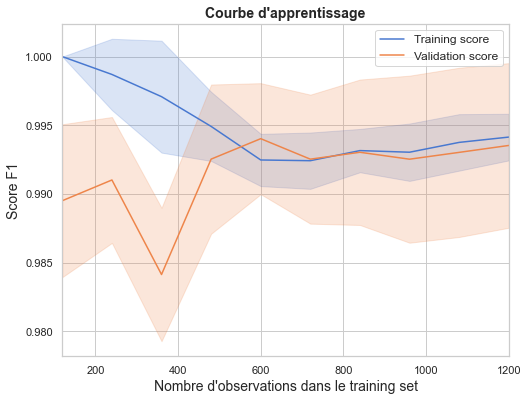


                                   Train set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False        396      7
True           4    793


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       403
           1       0.99      0.99      0.99       797

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200


                                    Test set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False         96      1
True           0    203


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1  

In [28]:
evaluate_model(logreg_sklearn, **data)

On stocke les modèles dans un dictionnaire pour comparer leurs performances à la fin.

In [29]:
models = {
    'Reg. logisitique': logreg_sklearn
}

On peut représenter les résultats de la classification en réalisant une ACP.

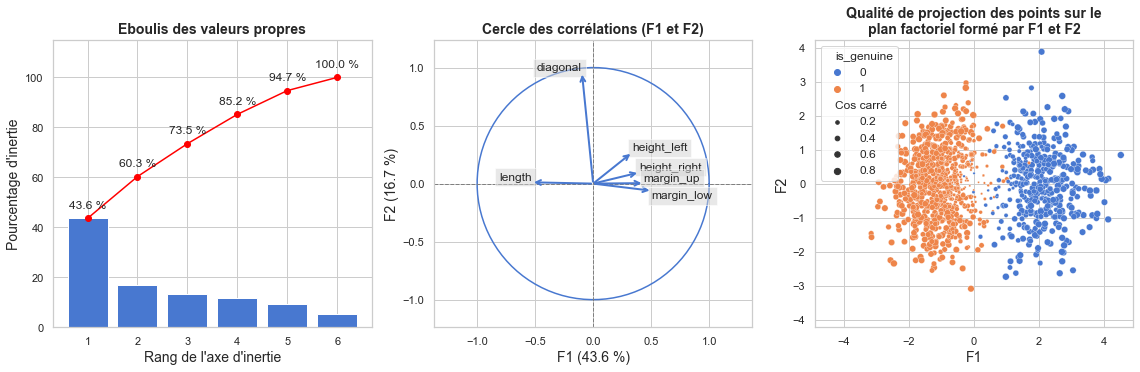

In [30]:
# caractéristiques de l'ACP
features = X_train.columns
n = len(features)

pca = PCA(n_components=n)
pca.fit_transform(X_train_scaled)
plot_pca_caracteristics(pca, X_train_scaled, y_train, features=features)

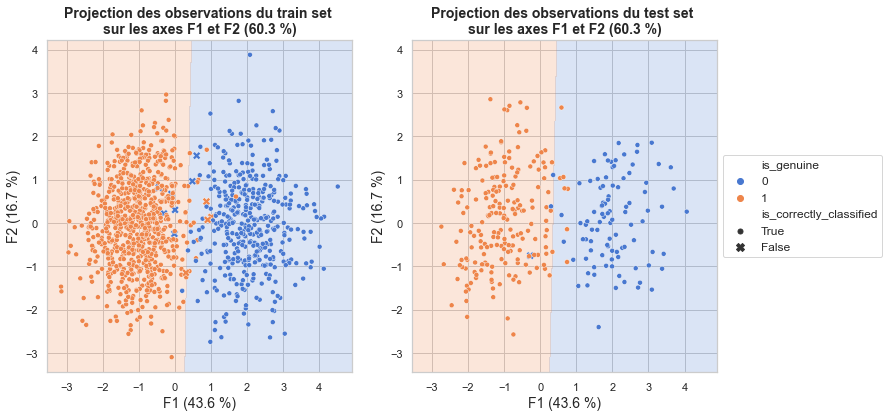

In [31]:
plot_classification_using_pca_v2(logreg_sklearn, **data)

A noter que le plan factoriel ne contient qu'environ 60 % de l'information initiale. Certains points sont donc mal projetés/représentés dans le plan (voir figure de la cellule précédente), et par conséquent ils peuvent apparaître mal classés sur le graphique alors qu'ils sont en réalité correctement classés, et inversement.

#### Optimisation des hyperparamètres avec GridSearchCV

In [32]:
param_grid = [
    {
        'penalty': [None],
    },
    {
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['liblinear']
    }
]

In [33]:
grid = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    scoring='f1',
    cv=5
)

In [34]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': [None]},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='f1')

In [35]:
print('Hyperparamètres du meilleur modèle :')
print(grid.best_params_)

Hyperparamètres du meilleur modèle :
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [36]:
print(f'Score F1 du meilleur modèle : {grid.best_score_:.3f}')

Score F1 du meilleur modèle : 0.993


In [37]:
best_logreg = grid.best_estimator_

In [38]:
# comparaison des coefficients des deux modèles (sans régularisation et avec
# régularisation L1)
pd.DataFrame(
    data=np.vstack((logreg_sklearn.coef_, best_logreg.coef_)).T,
    index=features,
    columns=['coef_no_reg', 'coef_l1']
)

,coef_no_reg,coef_l1
diagonal,0.111469,0.000000
height_left,-0.486633,-0.173019
height_right,-0.960583,-0.397578
margin_low,-3.567181,-1.952147
margin_up,-2.385833,-0.981204
length,4.804973,2.708635


On observe que la variable `diagonal` a été éliminée, ce qui n'est pas suprenant étant donné la faible valeur de son coefficient dans le modèle sans pénalité.

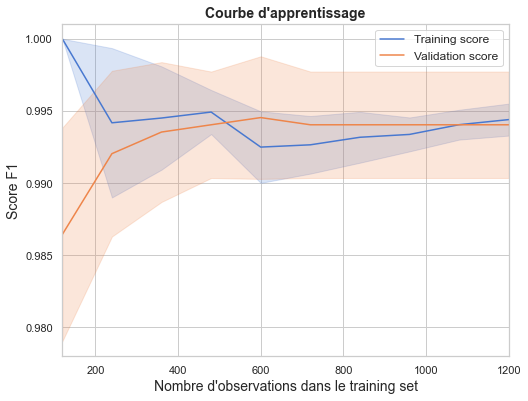


                                   Train set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False        395      8
True           2    795


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       403
           1       0.99      1.00      0.99       797

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200


                                    Test set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False         96      1
True           0    203


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1  

In [39]:
evaluate_model(best_logreg, **data)

In [40]:
models['Reg. logistique (L1)'] = best_logreg

## Méthode des k-means

On cherche à déterminer le nombre optimal de clusters avec la méthode du coude et le coefficient de silhouette.

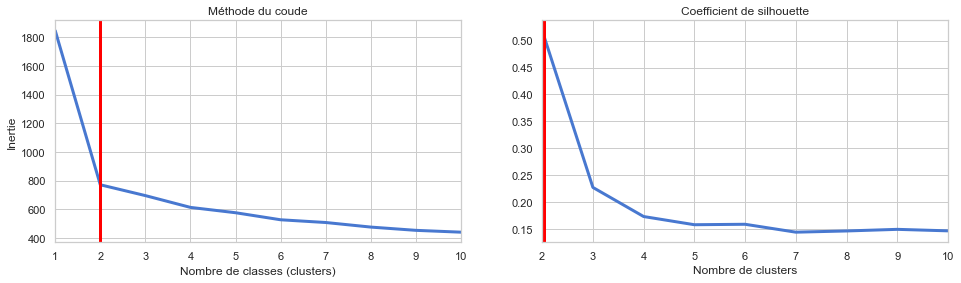

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_elbow(X_train, linewidth=3, x_vline=2, ax=axes[0])

plot_silhouette_score(X_train, linewidth=3, x_vline=2, ax=axes[1])

Le nombre optimal de clusters serait de deux, ce qui parait cohérent avec la distribution des points sur premier plan factoriel de l'ACP.

In [42]:
kmeans_2 = KMeans(n_clusters=2, n_init='auto')
evaluate_model(kmeans_2, **data, fitted=False)

                                   Train set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False        392     11
True           6    791


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       403
           1       0.99      0.99      0.99       797

    accuracy                           0.99      1200
   macro avg       0.99      0.98      0.98      1200
weighted avg       0.99      0.99      0.99      1200


                                    Test set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False         94      3
True           4    199


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        97
           1   

La performance du modèle est légèrement moins bonne comparée à la régression logistique.

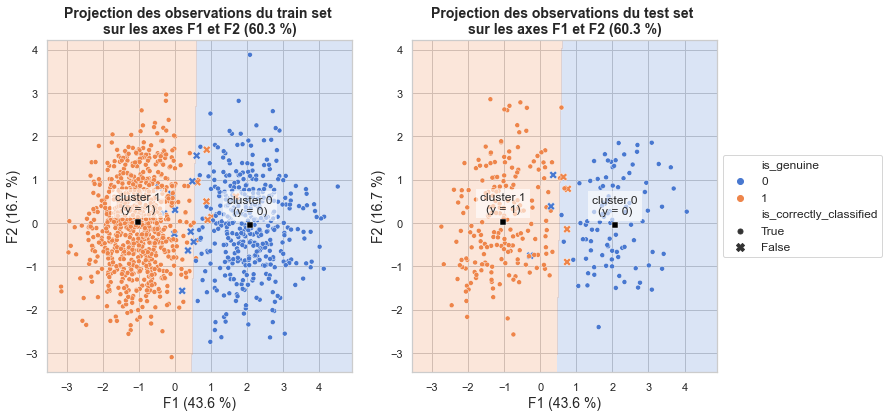

In [43]:
plot_classification_using_pca_v2(kmeans_2, **data)

In [44]:
models['KMeans'] = kmeans_2

## Algorithme des k-nearest neighbors (KNN)

On cherche à déterminer le nombre de voisins qui donne les meilleurs résultats. On utilise pour cela la classe `GridSearchCV`.

In [45]:
param_grid = {
    'n_neighbors': range(1, 21, 2)
}

In [46]:
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='f1',
    cv=5
)

In [47]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21, 2)}, scoring='f1')

In [48]:
grid.best_params_

{'n_neighbors': 5}

In [49]:
neighbors = grid.best_estimator_

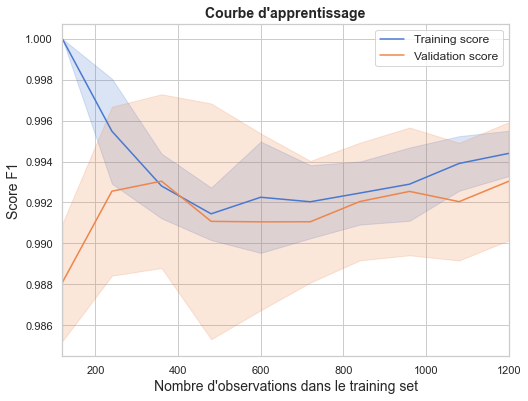


                                   Train set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False        395      8
True           2    795


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       403
           1       0.99      1.00      0.99       797

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200


                                    Test set                                    

Matrice de confusion
--------------------
Predicted  False  True 
Actual                 
False         95      2
True           1    202


Rapport de classification
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1  

In [50]:
evaluate_model(neighbors, **data)

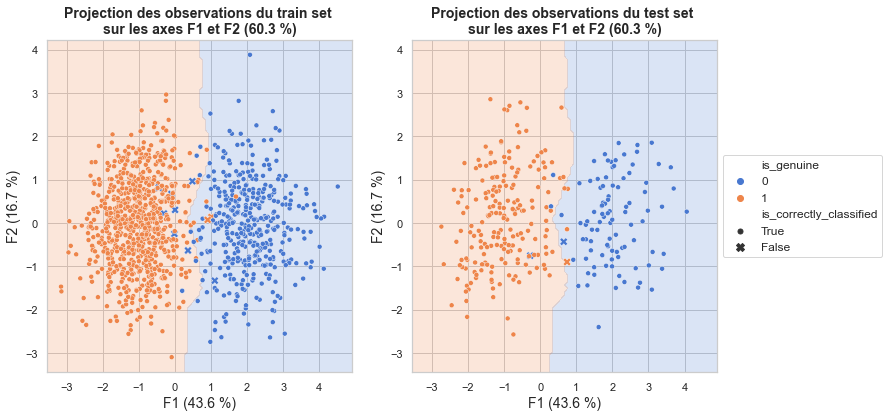

In [51]:
plot_classification_using_pca_v2(
    neighbors,
    **data,
    resolution=100
)

In [52]:
models['KNN'] = neighbors

## Comparaison des algorithmes

In [53]:
def print_f1_scores(models):
    title = "Score F1 (test set)"
    print(title)
    print("-" * len(title))

    for name, model in models.items():
        if isinstance(model, KMeans):
            cluster_mapper = get_cluster_mapper(model, y_train)
            y_test_pred = get_preds_kmeans(model, X_test_scaled, cluster_mapper)
        else:
            y_test_pred = model.predict(X_test_scaled)
        f1 = f1_score(y_test, y_test_pred)
        print(f"{name} : {f1:.3f}")

In [54]:
print_f1_scores(models)

Score F1 (test set)
-------------------
Reg. logisitique : 0.998
Reg. logistique (L1) : 0.998
KMeans : 0.983
KNN : 0.993


## Utilisation d'un pipeline

On peut automatiser le choix de l'algorithme avec la classe `Pipeline`.

In [55]:
set_config(display="diagram")

In [56]:
steps = [
    ('scaler', StandardScaler()),
    ('selector', SelectKBest()),  # ANOVA par défaut (f_classif)
    ('classifier', LogisticRegression())  # placeholder
]
pipeline = Pipeline(steps)

In [57]:
params = [
    {
        'selector__k': np.arange(1, 7),
        'classifier': [LogisticRegression(penalty=None)],
    },
    {
        'selector__k': np.arange(1, 7),
        'classifier': [LogisticRegression(solver='liblinear')],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': np.logspace(-3, 3, 7)
    },
    {
        'selector__k': np.arange(1, 7),
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': np.arange(1, 20, 2)
    },
    {
        'selector__k': np.arange(1, 7),
        'classifier': [GaussianNB()],
    }
]

In [58]:
grid = GridSearchCV(pipeline, params, scoring='f1', cv=5)
grid = grid.fit(X_train, y_train)

In [59]:
grid.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=13),
 'classifier__n_neighbors': 13,
 'selector__k': 5}

In [60]:
grid.best_score_

0.9937616458490016

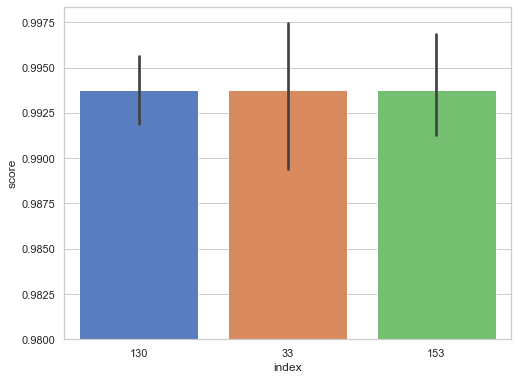

130:
{'classifier': KNeighborsClassifier(n_neighbors=13), 'classifier__n_neighbors': 13, 'selector__k': 5}
33:
{'classifier': LogisticRegression(solver='liblinear'), 'classifier__C': 0.1, 'classifier__penalty': 'l1', 'selector__k': 4}
153:
{'classifier': GaussianNB(), 'selector__k': 4}


In [61]:
plot_n_best_scores(grid.cv_results_, n=3, y_bottom_lim=0.98)

In [62]:
best_pipeline = grid.best_estimator_

In [63]:
# on affiche les variables sélectionnées
features = best_pipeline.feature_names_in_
features_out = best_pipeline['selector'].get_feature_names_out(features)

print("Selected features:", features_out)
print("Not selected:", set(features).difference(features_out))

Selected features: ['height_left' 'height_right' 'margin_low' 'margin_up' 'length']
Not selected: {'diagonal'}


In [64]:
y_test_pred = best_pipeline.predict(X_test)

In [65]:
confusion_matrix(y_test, y_test_pred)

array([[ 95,   2],
       [  0, 203]], dtype=int64)

In [66]:
f1 = f1_score(y_test, y_test_pred)
print(f"Score F1 : {f1:.3f}")

Score F1 : 0.995


# Test de l'algorithme sur des données de production

In [67]:
billets_prod = pd.read_csv('./data/billets_production.csv')

In [68]:
billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


On choisit la régression logistique avec régularisation L1 comme algorithme de prédiction.

In [69]:
def verif_billets(df):
    df = df.copy()
    
    if 'id' in df.columns:
        df = df.set_index('id')
    
    mapper = {0: 'Faux billet', 1: 'Vrai billet'}
    
    # on s'assure que les colonnes sont dans le même ordre que dans le
    # training set
    cols = [
        'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
        'length'
    ]
    
    X = df[cols]
    X_scaled = scaler.transform(X)
    
    df['Prédiction'] = best_logreg.predict(X_scaled)
    df['Prédiction'] = df['Prédiction'].map(mapper)
    df['Probabilité faux'] = np.round(best_logreg.predict_proba(X_scaled)[:, 0], 2)
    
    return df

In [70]:
verif_billets(billets_prod)

,diagonal,height_left,height_right,margin_low,margin_up,length,Prédiction,Probabilité faux
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,Faux billet,0.99
A_2,171.87,104.17,104.13,6.00,3.31,112.09,Faux billet,1.00
A_3,172.00,104.58,104.29,4.99,3.39,111.57,Faux billet,1.00
A_4,172.49,104.55,104.34,4.44,3.03,113.20,Vrai billet,0.07
A_5,171.65,103.63,103.56,3.77,3.16,113.33,Vrai billet,0.00


In [71]:
# on exporte le scaler et le modèle de régression
with open('./models/scaler.pickle',"wb") as f:
    pickle.dump(scaler, f)
    
with open('./models/logreg_l1.pickle',"wb") as f:
    pickle.dump(best_logreg, f)